In [2]:
#This code heavily references code =used for the following tutorial article:
###https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/


import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
dataset = pd.read_csv('data/500_five_min_intervals_btc.csv')

In [1268]:
tester = pd.DataFrame()
tester = tester.append(dataset.iloc[-1])
tester

,Unnamed: 0,ask,askVolume,average,baseVolume,bid,bidVolume,change,close,datetime,...,low,open,percentage,previousClose,quoteVolume,redd_sent,symbol,timestamp,twi_sent,vwap
500,500.0,55703.2,NaN,NaN,6154.049106,55703.1,NaN,NaN,55703.1,2021-03-16T17:06:35.090Z,...,52500.0,55627.6,NaN,NaN,3.392954e+08,0.0,BTC/USD,1.615914e+12,0.201418,55133.68398


In [4]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
dataset['close'] = y_scaler.fit_transform(dataset['close'].values.reshape(-1,1))
vol_scaler = MinMaxScaler(feature_range=(0, 1))
dataset['baseVolume'] = vol_scaler.fit_transform(dataset['baseVolume'].values.reshape(-1,1))

In [1270]:
dataset.close.values.reshape(-1,1).shape

(501, 1)

In [1228]:
test_df = live_ticker_shaper(tester, scaler)

KeyError: 'datetime'

In [1172]:
print(test_df)

[[0.3231988 0.6076185 0.        0.489654 ]]


In [1296]:
dataset.head()

,Unnamed: 0,ask,askVolume,average,baseVolume,bid,bidVolume,change,close,datetime,...,low,open,percentage,previousClose,quoteVolume,redd_sent,symbol,timestamp,twi_sent,vwap
0,0,60575.8,NaN,NaN,0.001353,60575.7,NaN,NaN,1.000000,2021-03-14T23:24:31.515Z,...,59258.8,61174.9,NaN,NaN,1.922725e+08,0.521747,BTC/USD,1.615764e+12,0.192540,60437.15997
1,1,60479.3,NaN,NaN,0.000000,60470.4,NaN,NaN,0.985638,2021-03-14T23:29:31.235Z,...,59258.8,61174.9,NaN,NaN,1.918609e+08,0.510972,BTC/USD,1.615765e+12,0.155409,60433.77015
2,2,60391.2,NaN,NaN,0.001822,60391.1,NaN,NaN,0.974360,2021-03-14T23:34:31.722Z,...,59258.8,61174.9,NaN,NaN,1.923922e+08,0.508851,BTC/USD,1.615765e+12,0.169993,60431.11236
3,3,60122.9,NaN,NaN,0.002679,60117.8,NaN,NaN,0.935538,2021-03-14T23:39:31.413Z,...,59258.8,61174.9,NaN,NaN,1.926364e+08,0.526616,BTC/USD,1.615765e+12,0.158870,60428.04756
4,4,60011.8,NaN,NaN,0.006351,60008.7,NaN,NaN,0.922815,2021-03-14T23:44:31.704Z,...,59258.8,61174.9,NaN,NaN,1.937058e+08,0.515635,BTC/USD,1.615765e+12,0.133040,60422.18785


In [5]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'],infer_datetime_format = True)

In [1175]:
#This is function is designed to take live ticker data and shape it for our LSTM model.
def live_ticker_shaper(dataset, scaler):
    dataset['datetime'] = pd.to_datetime(dataset['datetime'],infer_datetime_format = True)
    dataset.set_index(['datetime'],inplace = True)
    data = dataset[['close','baseVolume','redd_sent','twi_sent']].copy()
    #data = data.append(data[0,:])
    print(data)
    values = data.values
    values = values.astype('float32')
    #scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.transform(values)
    print(scaled)
    #reframed = series_to_supervised(scaled, 1, 1)
    #reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
    return scaled #reframed.values

In [1179]:
dataset.head()

,Unnamed: 0,ask,askVolume,average,baseVolume,bid,bidVolume,change,close,datetime,...,low,open,percentage,previousClose,quoteVolume,redd_sent,symbol,timestamp,twi_sent,vwap
0,0,60575.8,NaN,NaN,3181.362949,60575.7,NaN,NaN,60575.8,2021-03-14 23:24:31.515000+00:00,...,59258.8,61174.9,NaN,NaN,1.922725e+08,0.521747,BTC/USD,1.615764e+12,0.192540,60437.15997
1,1,60479.3,NaN,NaN,3174.729925,60470.4,NaN,NaN,60472.4,2021-03-14 23:29:31.235000+00:00,...,59258.8,61174.9,NaN,NaN,1.918609e+08,0.510972,BTC/USD,1.615765e+12,0.155409,60433.77015
2,2,60391.2,NaN,NaN,3183.662191,60391.1,NaN,NaN,60391.2,2021-03-14 23:34:31.722000+00:00,...,59258.8,61174.9,NaN,NaN,1.923922e+08,0.508851,BTC/USD,1.615765e+12,0.169993,60431.11236
3,3,60122.9,NaN,NaN,3187.864044,60117.8,NaN,NaN,60111.7,2021-03-14 23:39:31.413000+00:00,...,59258.8,61174.9,NaN,NaN,1.926364e+08,0.526616,BTC/USD,1.615765e+12,0.158870,60428.04756
4,4,60011.8,NaN,NaN,3205.871977,60008.7,NaN,NaN,60020.1,2021-03-14 23:44:31.704000+00:00,...,59258.8,61174.9,NaN,NaN,1.937058e+08,0.515635,BTC/USD,1.615765e+12,0.133040,60422.18785


In [6]:
dataset.set_index(['datetime'],inplace = True)

In [7]:
data = dataset[['close','baseVolume','redd_sent','twi_sent']].copy()

In [1237]:
#data = data.head(5).copy()

In [8]:
# convert series to supervised learning
###https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [9]:
values = data.values

In [10]:
values = values.astype('float32')

In [1241]:
print(values)

[[6.0575801e+04 3.1813630e+03 5.2174652e-01 1.9253980e-01]
 [6.0472398e+04 3.1747300e+03 5.1097208e-01 1.5540920e-01]
 [6.0391199e+04 3.1836621e+03 5.0885117e-01 1.6999280e-01]
 ...
 [5.5625801e+04 6.1655117e+03 0.0000000e+00 2.0538241e-01]
 [5.5842102e+04 6.1573813e+03 0.0000000e+00 1.8075921e-01]
 [5.5703102e+04 6.1540493e+03 0.0000000e+00 2.0141780e-01]]


In [1254]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values,y=values[:,0])
#scaled.shapedataset['close'] = y_scaler.fit_transform(dataset['close'].values.reshape(-1,1))
#vals = scaler.fit_transform(dataset['close'].values.reshape(-1,1))

In [11]:
scaled = values

In [12]:
reframed = series_to_supervised(scaled, 5, 1)

In [13]:
reframed.head()

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),...,var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
5,1.000000,0.001353,0.521747,0.192540,0.985638,0.000000,0.510972,0.155409,0.974360,0.001822,...,0.526616,0.158870,0.922815,0.006351,0.515635,0.133040,0.866756,0.010666,0.515635,0.130183
6,0.985638,0.000000,0.510972,0.155409,0.974360,0.001822,0.508851,0.169993,0.935538,0.002679,...,0.515635,0.133040,0.866756,0.010666,0.515635,0.130183,0.836685,0.015361,0.515635,0.107810
7,0.974360,0.001822,0.508851,0.169993,0.935538,0.002679,0.526616,0.158870,0.922815,0.006351,...,0.515635,0.130183,0.836685,0.015361,0.515635,0.107810,0.795766,0.039739,0.497583,0.147377
8,0.935538,0.002679,0.526616,0.158870,0.922815,0.006351,0.515635,0.133040,0.866756,0.010666,...,0.515635,0.107810,0.795766,0.039739,0.497583,0.147377,0.792488,0.056918,0.497583,0.130456
9,0.922815,0.006351,0.515635,0.133040,0.866756,0.010666,0.515635,0.130183,0.836685,0.015361,...,0.497583,0.147377,0.792488,0.056918,0.497583,0.130456,0.822810,0.058952,0.497583,0.151138


In [14]:
reframed.drop(reframed.columns[[21,22,23]], axis=1, inplace=True) #4,8,12,16,20
print(reframed.head())

   var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  \
5   1.000000   0.001353   0.521747   0.192540   0.985638   0.000000   
6   0.985638   0.000000   0.510972   0.155409   0.974360   0.001822   
7   0.974360   0.001822   0.508851   0.169993   0.935538   0.002679   
8   0.935538   0.002679   0.526616   0.158870   0.922815   0.006351   
9   0.922815   0.006351   0.515635   0.133040   0.866756   0.010666   

   var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  ...  var4(t-3)  var1(t-2)  \
5   0.510972   0.155409   0.974360   0.001822  ...   0.169993   0.935538   
6   0.508851   0.169993   0.935538   0.002679  ...   0.158870   0.922815   
7   0.526616   0.158870   0.922815   0.006351  ...   0.133040   0.866756   
8   0.515635   0.133040   0.866756   0.010666  ...   0.130183   0.836685   
9   0.515635   0.130183   0.836685   0.015361  ...   0.107810   0.795766   

   var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  \
5   0.002679   0.526616   0.158870   0.922815

In [15]:
values_fin = reframed.values

In [16]:
split = int(0.7 * len(values_fin))
train = values_fin[:split,:]
test = values_fin[split:,:]
n_features = 4
n_steps = 5

In [1194]:
print(train[1])

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan 6.057580e+04 3.181363e+03 5.217465e-01 1.925398e-01
 6.047240e+04]


In [1195]:
print(test[0])

[5.4339102e+04 8.0264575e+03 0.0000000e+00 1.5256780e-01 5.4433602e+04
 8.0309873e+03 0.0000000e+00 2.7061179e-01 5.4537301e+04 8.0511060e+03
 0.0000000e+00 2.1856660e-01 5.4655898e+04 8.0770586e+03 0.0000000e+00
 2.3331620e-01 5.4800000e+04 8.0780029e+03 0.0000000e+00 2.1272160e-01
 5.4566199e+04]


In [1196]:
values.shape

(501, 21)

In [17]:
n_obs = n_steps * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

(347, 20) 347 (347,)


In [18]:
#train_X, train_y = values[:, :n_obs], values[:, -1]
#train_X.shape

In [19]:
train_X = train_X.reshape((train_X.shape[0], n_steps, n_features))
test_X = test_X.reshape((test_X.shape[0], n_steps, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(347, 5, 4) (347,) (149, 5, 4) (149,)


In [20]:
#train_y = train_y.reshape(347,1)

In [21]:
#test_y = test_y.reshape(149,1)
#model.fit_predict()

In [22]:
from tensorflow.keras.layers import Flatten

In [23]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(units=50))
model.add(Dropout(.2))
#model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(.2))
#model.add(Flatten())
model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
###https://stackoverflow.com/questions/55422711/keras-training-progress-bar-on-one-line-with-epoch-number
import tensorflow as tf
class PrintLogs(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0
        params['verbosity'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='\r')
    #def on_batch_begin(self, epoch, logs=None):
       #print('~~~~~~~~~~~~~Training~~~~~~~~~~~~~~~~~~~~~~~~~~~~', end='\r')

In [25]:
epochs = 1000
history = model.fit(train_X, train_y, epochs=epochs, validation_data = (test_X, test_y),
                    batch_size=7, verbose=0, shuffle=False, callbacks=[PrintLogs(epochs)])

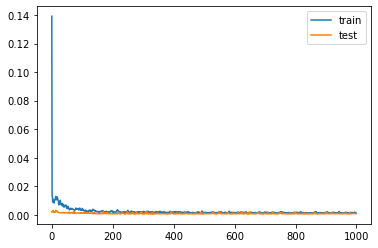

In [26]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [27]:
# make a prediction
yhat = model.predict(test_X)

In [28]:
yhat = yhat.reshape(-1,1)

In [29]:
model.evaluate(test_X, test_y, verbose=1)

5/5 [==============================] - 0s 3ms/step - loss: 7.1137e-04


0.0007113713072612882

In [30]:
yhat = y_scaler.inverse_transform(yhat)

In [31]:
yhat = yhat[:,0]

In [32]:
#yhat = yhat.reshape(150,1)
feat_cols = -1 * (n_features - 1)

In [33]:
tested_X = test_X.reshape((test_X.shape[0], n_steps*n_features))

In [34]:
#inv_yhat = np.concatenate((yhat, test_X[:, -3:]), axis=1)

In [35]:
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

In [36]:
from math import sqrt

In [37]:
tested_y = y_scaler.inverse_transform(test_y.reshape(-1,1))
tested_y=tested_y[:,0]

In [38]:
# invert scaling for actual
#tested_y = y_scaler.inverse_transform(yhat)
#inv_y = np.concatenate((test_y, test_X[:, feat_cols:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(tested_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 192.025


In [1407]:
inv_yhat.shape

(151,)

In [1423]:
from tensorflow.keras.callbacks import Callback

In [1424]:
class PrintLogs():
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0
        params['verbosity'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='\r')
    #def on_batch_begin(self, epoch, logs=None):
       #print('~~~~~~~~~~~~~Training~~~~~~~~~~~~~~~~~~~~~~~~~~~~', end='\r')

<AxesSubplot:>

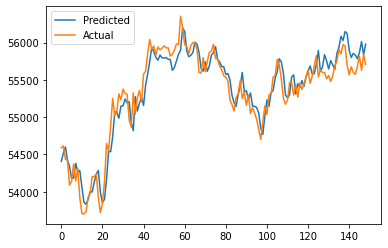

In [39]:
results = {'Predicted':yhat ,'Actual':tested_y}
df_results = pd.DataFrame(results)
df_results.plot()

In [40]:
df_results.tail()

,Predicted,Actual
144,55782.949219,55686.097656
145,55869.414062,55814.296875
146,56011.222656,55625.800781
147,55837.746094,55842.097656
148,55978.316406,55703.097656


In [1422]:
#model.save_weights("lstm_five_model.h5")

In [686]:
def generate_model(path = 'five_model.h5', train_X):
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
    model.add(Dropout(.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(.2))
    #model.add(LSTM(units=50, return_sequences=True))
    #model.add(Dropout(.2))
    model.add(Dense(1))
    #model.compile(loss='mae', optimizer='adam')
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.load_weights(path)
    return model

In [802]:
madel = generate_model()

In [857]:
test_X.shape

(150, 4)

In [901]:
b.shape

In [902]:
pre_df

array([[0.3255188]], dtype=float32)

In [904]:
z =np.array([[0.9,0.9,0.9]],dtype='float32')
z

array([[0. , 0.9, 0.9]], dtype=float32)

In [908]:
pre_df = np.concatenate((pre_df, z),axis=1)

In [849]:
a = test_df.reshape(1,1,4)
b = test_df[:,0]

In [818]:
def live_fitter(model, train_X, train_y):
    model.fit(train_X, train_y, epochs=50, batch_size=1, verbose=1, shuffle=False)

In [850]:
one_live = live_fitter(madel, a,  b)

Train on 1 samples
Epoch 1/50
1/1 [==============================] - 0s 10ms/sample - loss: 3.6630e-04
Epoch 2/50
1/1 [==============================] - 0s 4ms/sample - loss: 2.8182e-04
Epoch 3/50
1/1 [==============================] - 0s 4ms/sample - loss: 0.0017
Epoch 4/50
1/1 [==============================] - 0s 5ms/sample - loss: 1.9460e-04
Epoch 5/50
1/1 [==============================] - 0s 5ms/sample - loss: 4.4848e-04
Epoch 6/50
1/1 [==============================] - 0s 5ms/sample - loss: 1.5976e-04
Epoch 7/50
1/1 [==============================] - 0s 6ms/sample - loss: 1.5490e-05
Epoch 8/50
1/1 [==============================] - 0s 5ms/sample - loss: 9.5652e-04
Epoch 9/50
1/1 [==============================] - 0s 5ms/sample - loss: 0.0034
Epoch 10/50
1/1 [==============================] - 0s 5ms/sample - loss: 1.8796e-05
Epoch 11/50
1/1 [==============================] - 0s 5ms/sample - loss: 6.9560e-04
Epoch 12/50
1/1 [==============================] - 0s 4ms/sample - loss: 

In [895]:
test_df = test_df.reshape(1, 1,4)
pre_df = madel.predict(test_df)

In [896]:
pre_df.shape

(1, 1, 1)

In [897]:
pre_df = pre_df.reshape(1,1)

In [909]:
inv_tex = scaler.inverse_transform(pre_df)

In [910]:
print(inv_tex[:,0])

[55719.8]
